In [1]:
# author: Yuman Lin
# Project 3 for CFRM507

import numpy as np
import pandas as pd
from scipy.stats import norm 
import matplotlib.pyplot as plt

## Input Data

In [2]:
# weight of each mix
weight = np.array([[30, 30, 10, 10, 10, 10, 0],[25, 25, 10, 10, 20, 10, 0], [25, 21, 8, 8, 30, 8, 0], 
                 [23, 19, 6, 6, 40, 6, 0], [21, 15, 4, 5, 45, 5, 5], [16, 12, 4, 4, 50, 4, 10], 
                [13, 9, 2, 3, 55, 3, 15], [8, 6, 1, 2, 51, 2, 30]])/100

# Annual fee
fee_r = np.array([20, 18, 16, 14, 12, 10, 8, 6])/10000

# mean
mean = np.array([6, 5.9, 7, 5.6, 1.9, 5.2, 1.5])/100

# stdev
stdev = np.diag([19.1, 20.2, 26.8, 20.7, 3.8, 7, 5.8])/100

# correlation matrix
corr = np. array([[1.00, 0.74, 0.67, 0.74, 0.13, 0.47, 0.02], [0.74, 1.00, 0.70, 0.78, 0.09, 0.46, 0.00],
                [0.67, 0.70, 1.00, 0.66, 0.07, 0.45, -0.03], [0.74, 0.78, 0.66, 1.00, 0.10, 0.37, -0.03],
                [0.13, 0.09, 0.07, 0.10, 1.00, 0.10, 0.10], [0.47, 0.46, 0.45, 0.37, 0.10, 1.00, 0.55],
                [0.02, 0.00, -0.03, -0.03, 0.10, 0.55, 1.00]])

a = np.diag([19.1, 20.2, 26.8, 20.7, 3.8, 7, 5.8])/100

# covariance matrix
var = np.dot(np.dot(a, corr),a)

TARGET = 2079.2

In [3]:
# covariance matrix: log normal to normal distribution
var

array([[ 0.036481  ,  0.02855068,  0.03429596,  0.02925738,  0.00094354,
         0.0062839 ,  0.00022156],
       [ 0.02855068,  0.040804  ,  0.0378952 ,  0.03261492,  0.00069084,
         0.0065044 ,  0.        ],
       [ 0.03429596,  0.0378952 ,  0.071824  ,  0.03661416,  0.00071288,
         0.008442  , -0.00046632],
       [ 0.02925738,  0.03261492,  0.03661416,  0.042849  ,  0.0007866 ,
         0.0053613 , -0.00036018],
       [ 0.00094354,  0.00069084,  0.00071288,  0.0007866 ,  0.001444  ,
         0.000266  ,  0.0002204 ],
       [ 0.0062839 ,  0.0065044 ,  0.008442  ,  0.0053613 ,  0.000266  ,
         0.0049    ,  0.002233  ],
       [ 0.00022156,  0.        , -0.00046632, -0.00036018,  0.0002204 ,
         0.002233  ,  0.003364  ]])

In [4]:
# calculate the variance of each mix
variance = []
for i in range(8):
    w0 = weight[i]
    w1 = w0.T
    temp = np.dot(np.dot(w1, var), w0)
    variance.append(temp)
print("variance of each mix")
print(variance)

# calculate the mean of the return of each mix
mean_return = []
for i in range(8):
    temp = sum(weight[i]*mean)
    mean_return.append(temp)
print("return of each mix")
print(mean_return)

variance of each mix
[0.023257769599999995, 0.0182376319, 0.014312408339999999, 0.010969508203999999, 0.007798500907999998, 0.005343254368, 0.003379079508, 0.0019351333599999998]
return of each mix
[0.0554, 0.05135, 0.04733, 0.04329, 0.03895, 0.0348, 0.030449999999999998, 0.02539]


## Explanation for log normal and normal
Draw random samples from a multivariate lognormal distribution.
The multivariate lognormal is a generalization of the one-dimensional
lognormal distribution to higher dimensions.  Such a distribution
is specified by its mean and covariance matrix.  These parameters
are analogous to the mean (average or "center") and
variance (standard deviation, or "width," squared) of the
one-dimensional lognormal distribution.

Parameters
    
    mean : 1-D array_like, of length N
        Mean of the N-dimensional distribution.
    cov : 2-D array_like, of shape (N, N)
        Covariance matrix of the distribution. It must be symmetric and
        positive-semidefinite for proper sampling.
    size : int or tuple of ints, optional
        Given a shape of, for example, ``(m,n,k)``, ``m*n*k`` samples are
        generated, and packed in an `m`-by-`n`-by-`k` arrangement.  Because
        each sample is `N`-dimensional, the output shape is ``(m,n,k,N)``.
        If no shape is specified, a single (`N`-D) sample is returned.
    clip: boolean, optional
        Clip the spectrum of the normal covariance matrix in order to ensure
        that the conversion from lognormal to normal does not violate the
        non-negative semi-definiteness of the covariance matrix.
    spectrum_min: float, optional
        The clipping value for the eigenvalues of the covariance matrix for the
        associated normal distribution.
Returns
    
    out : ndarray
        The drawn samples, of shape *size*, if that was provided.  If not,
        the shape is ``(N,)``.
        In other words, each entry ``out[i,j,...,:]`` is an N-dimensional
        value drawn from the distribution.
Notes
    
    The samples for a multivariate lognormal distribution are drawn by computing
    the mean vector and covariance matrix for the associated normal distribution.
    The normal samples are then exponentiated in order to obtain the multivariate
    lognormal samples.


In [5]:
# log normal stuffs
def _convert_lognormal_params(mu, cov):
    """
    Helper function to convert lognormal means and covariances to normal
    means and covariances.
    """
    sigma = np.diag(cov)
    norm_sigma = np.log(1 + (sigma / (mu ** 2)))
    norm_mu = np.log(mu) - 0.5 * norm_sigma
    i, j = np.indices(cov.shape)
    norm_cov = np.log(1 + cov[i, j]/((1 + norm_mu[i])*(1 + norm_mu[j])))
    #norm_cov = np.log(1 + (cov[i, j] / np.exp(norm_mu[i] + norm_mu[j] + 0.5 * (norm_sigma[i] + norm_sigma[j]))))
    return norm_mu, norm_cov


def multivariate_lognormal(mu, cov, size=1, clip=False, spectrum_min=1e-12):
    # y = ln(1+r) is normal distribution
    mu = mu + 1
    norm_mu, norm_cov = _convert_lognormal_params(mu, cov)
    
    if clip is True:
        eigen_vals, eigen_vec = np.linalg.eig(norm_cov)
        eigen_vals[eigen_vals <= 0] = spectrum_min
        norm_cov = np.dot(eigen_vec, eigen_vals[:, np.newaxis] * eigen_vec.T)
    norm_samples = np.random.multivariate_normal(norm_mu, norm_cov, size=size)
    # y is normal distribution, so that np.exp(y)-1 = r
    return np.exp(norm_samples) - 1

In [6]:
# generate N * 8 matrix for return of mix
def generate_scenario(N):
    # shape: N * 8
    return np.dot(multivariate_lognormal(mean, var, N), weight.T)

In [7]:
# new contribution for each age, 15% of the income
def get_saving(age):
    return (103.63 - 0.03 * (55 - age)) * 0.15

In [8]:
# utility function
def utility(x, TARGET):
    if x > TARGET:
        return x**0.7/0.7
    else:
        return x**0.7/0.7 - (TARGET-x)**2/5000

## Step 1: generate scenario and build tables  

(1) Important variables: N_SCENARIO (number of the scenario), young and old (the range of account balance), step (the density of account balance).    
(2) Generate a scenario tree given the number of the scenrio.    
(3) Step 1: construct a class to record tables with last mix, account balance, decision and utility from current age to retirement. In other words, every age has a table. Given the account balance and last decision, it records the decision for this year and expected utility.    
(4) At age 67, we can calculate the utility with the utility function directly but from the age 66 and younger, we need to use dynamic programming and backward recursion to get the expected utility.   
(5) For the first year, clients does not have any restrictions on mixs so that they will choose the mix with max uitility among 8 mixs. (function: get_first_action)  

In [9]:
# the number of the scenario
N_SCENARIO = 10000

# every time the code will get a same random number
np.random.seed(1)

# Step One: generate tables for each year
class Years_Data():
    def __init__(self, young, old, low, high, step, mix=8):
        # young: the youngest current age among six clients
        # old: the age for retirement
        # low: the smallest amount of account balance in the table
        # high: the largest amount of account balance in the table
        # mix: 1 to 8
        # step: step in account balance
        
        # (low, high)
        # balance, mix, [utility, action]
        assert old > young and high > low
        self.low = low
        self.high = high
        self.step = step
        self.mix = mix
        self.young = young
        self.old = old
        
        # balance: from low to high, from low to high
        # np.arange(5,15+1, 5)   (5, 10, 15)
        self.balance = np.arange(low,high+1,step)
        
        # different years, account balance, mix, (utility and action)
        # each year has its own table to record bal, mix (last decision), (utility and mix: action for this year)
        self.table = np.zeros((old - young + 1, self.balance.shape[0], mix, 2))
        
        # index: to get data in a convenient way
        self.mix_index = np.moveaxis(np.tile(np.arange(self.mix), (self.balance.shape[0], N_SCENARIO, 1)), 1, -1)
        
        self.construct_table()
        
    # construct table from year 66 (table index: 1) to youngest year
    def construct_year(self, cur_year):
        scenario = 1 + generate_scenario(N_SCENARIO) - fee_r # N * 8 matrix for (1 + r - fee_rate)
        saving = get_saving(self.old - cur_year) # a single scalar 
        
        new_balance = np.array([b * scenario + saving for b in self.balance]) # bal * N_SCENARIO * 8
        new_balance = np.moveaxis(new_balance, 1, -1) # bal * 8 * 1000
        #print("new_balance shape", new_balance.shape)
        
        # get ceil and floor
        # some account balances are among two specific numbers in next year table, need interpolation
        ceil_indx = np.ceil((new_balance - self.low)/ self.step).astype('int') # bal * 8 * N_SCENARIO
        floor_indx = np.floor((new_balance - self.low) / self.step).astype('int') # bal * 8 * N_SCENARIO
        
        # Clip (limit) the values in an array.
        # Given an interval, values outside the interval are clipped to the interval edges.
        # value out the range: use the maximum value in the range to replace it.
        ceil_indx = np.clip(ceil_indx, 0, self.balance.shape[0]-1)
        floor_indx = np.clip(floor_indx, 0, self.balance.shape[0]-1)
        #print("ceil_index shape", ceil_indx.shape)
        #print("floor_index shape", floor_indx.shape)
        #print("mix_indx shape", self.mix_index.shape)
        #print(self.balance.shape)
        
        # look up utility from next year
        ceil_util = self.table[cur_year-1, ceil_indx, self.mix_index, 0]
        floor_util = self.table[cur_year-1, floor_indx, self.mix_index, 0]
        
        # linear interpolation, shape: bal * 8 * N_SCENARIO
        # if ceil_indx = low_indx, the bal is out the range, it should be equal to the max or min of the balance table
        #print((ceil_util != floor_util).sum())
        new_util = (ceil_util != floor_util) * ((self.balance[ceil_indx] - new_balance) * floor_util + (new_balance - self.balance[floor_indx]) * ceil_util) / self.step + (ceil_util == floor_util) * ceil_util
        
        #print("new_tile shape", new_util)
        
        # calculate the mean of utility
        # shape: bal * 8, expected util if take this mix at this balance
        new_util = new_util.mean(-1) 
        
        # fill in table of this year
        # get index of row and column
        row, col = np.indices((self.balance.shape[0], self.mix))
        
        # only can choose from i-1, i, i+1
        # for mix 1, only can choose 1 and 2; for mix 8: only can choose 7 and 8
        mix_action = np.clip([[i-1, i, i+1] for i in np.arange(8)], 0, self.mix-1) # 8 * 3
        # for every balance
        mix_action = np.tile(mix_action, (self.balance.shape[0], 1, 1)) # bal * 8 * 3
        bal_indx = np.moveaxis(np.tile(row, (3, 1, 1)), 0, -1) # bal * 8 * 3
        
        # get the max from i-1, i and i+1
        max_action = np.argmax(new_util[bal_indx, mix_action], axis = -1) # bal * 8
        
        # get the max index, 0, 1 and 2
        self.table[cur_year, :, :, 1] = mix_action[row, col, max_action]
        #print("new_util shape", new_util.shape)
        #print("row shape", row.shape)
        #print("mix_action shape", mix_action.shape)
        #print("max_action shape", max_action.shape)
        
        # fill in the table with max action: index 0: mix i-1; index 1: mix i, index 2: mix i+1
        max_action = mix_action[row, col, max_action]
        #print("max_action shape", max_action.shape)
        self.table[cur_year, :, :, 0] = new_util[row, max_action]        
    
    # construct the table for each year, bal, mix for last time, utility and decision
    def construct_table(self):
        # construct oldest
        # retirement age: 67, use utility function to calculate its utility directly
        self.table[0, :, :, 0] = np.tile((self.balance**0.7)/0.7 - (self.balance <= TARGET) * ((TARGET - self.balance)**2)/5000, (self.mix, 1)).T
        
        # other ages
        # dynamic programming, backward recursion
        cur_year = self.old - 1
        while cur_year >= self.young:
            print("constructing " + str(cur_year) + "...")
            # backward, table 0 is Age 67, and table 1 is Age (67-66)...
            self.construct_year(self.old - cur_year)
            cur_year -= 1
    
    # simulate actions, for step 2
    def simulate_actions(self, age, balance, action):
        assert age >= self.young and age <= self.old
        assert balance.shape == action.shape
        balance = np.clip(balance, self.low, self.high)
        return self.table[self.old-age, (np.round((balance - self.low) / self.step)).astype(int), action, 1]
    
    # get current mix, no restriction, choose the mix with max utility in step 1
    def get_first_action(self, age, balance):
        # assume balance is scalar
        assert age >= self.young and age <= self.old
        balance = max(self.low, min(self.high, balance)) # clip
        
        balance = np.round((balance - self.low)/self.step)
        
        return np.argmax(self.table[self.old-age, int(balance),:, 0])

## construct tables for each year

In [10]:
# youngest year in the data:50
# retirement year: 67
# balance range: [40, 10000]
# step: 20
# mix number: 8
year = Years_Data(50, 67, 0, 10000, 20, 8)

constructing 66...
constructing 65...
constructing 64...
constructing 63...
constructing 62...
constructing 61...
constructing 60...
constructing 59...
constructing 58...
constructing 57...
constructing 56...
constructing 55...
constructing 54...
constructing 53...
constructing 52...
constructing 51...
constructing 50...


In [11]:
year.mix_index[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [5, 5, 5, ..., 5, 5, 5],
       [6, 6, 6, ..., 6, 6, 6],
       [7, 7, 7, ..., 7, 7, 7]])

In [12]:
year.balance

array([    0,    20,    40,    60,    80,   100,   120,   140,   160,
         180,   200,   220,   240,   260,   280,   300,   320,   340,
         360,   380,   400,   420,   440,   460,   480,   500,   520,
         540,   560,   580,   600,   620,   640,   660,   680,   700,
         720,   740,   760,   780,   800,   820,   840,   860,   880,
         900,   920,   940,   960,   980,  1000,  1020,  1040,  1060,
        1080,  1100,  1120,  1140,  1160,  1180,  1200,  1220,  1240,
        1260,  1280,  1300,  1320,  1340,  1360,  1380,  1400,  1420,
        1440,  1460,  1480,  1500,  1520,  1540,  1560,  1580,  1600,
        1620,  1640,  1660,  1680,  1700,  1720,  1740,  1760,  1780,
        1800,  1820,  1840,  1860,  1880,  1900,  1920,  1940,  1960,
        1980,  2000,  2020,  2040,  2060,  2080,  2100,  2120,  2140,
        2160,  2180,  2200,  2220,  2240,  2260,  2280,  2300,  2320,
        2340,  2360,  2380,  2400,  2420,  2440,  2460,  2480,  2500,
        2520,  2540,

In [13]:
# client data
current_age = np.array([50, 54, 54, 57, 62, 65])
current_bal = np.array([1000, 900, 500, 1500, 1200, 1600])

client_data = pd.DataFrame({'current_age': current_age, 'current_bal': current_bal}, columns=['current_age', 'current_bal'])
print(client_data)

   current_age  current_bal
0           50         1000
1           54          900
2           54          500
3           57         1500
4           62         1200
5           65         1600


## current mix choice for six clients

In [14]:
# get current mix for each client (1-6)
for i in range(6):
    
    age = client_data.current_age[i]
    bal = client_data.current_bal[i]
    
    mix = year.get_first_action(age, bal)+1
    print(mix)

1
1
1
1
1
3


## Step 2: simulate for each client
(1) In the first step, we can get the current mix (decision at current age) of each client.  
(2) Stochastic programming: simulate new return to calculate account balance for next year and look up the table to make a decision for near year.  
(3) At the retire age 67, it can get an average account balance and test it whether it is larger than TARGET.  

In [15]:
# function for simulation in second step
def simulate(age, balance, retire = 67):
    trajectory = []
    first_action = year.get_first_action(age, balance)
    actions = np.tile(first_action, N_SCENARIO)
    balances = np.tile(balance, N_SCENARIO)
    row = np.indices((N_SCENARIO,))
    while age < retire:
        scenario = 1 + generate_scenario(N_SCENARIO) - fee_r # N * 8
        saving = get_saving(age)
        balances = balances * scenario[row, actions].reshape(-1) + saving
        trajectory.append(actions)
        age += 1
        #print("action shape", actions.shape)
        #print("bal shape", balances.shape)
        actions = year.simulate_actions(age, balances, actions).astype(int)
        
    return balances, np.array(trajectory)

## Client 1: Amy Abrams

In [16]:
client1, t = simulate(50, 1000)
print(client1.mean())
print(client1.mean()>=TARGET)

2811.4507034819235
True


In [17]:
(client1>TARGET).mean()

0.5761

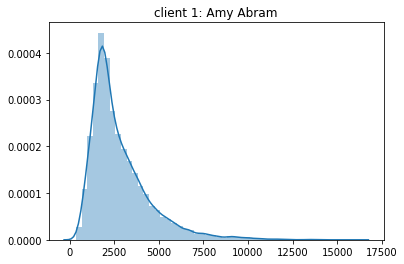

In [18]:
import seaborn as sns
sns.distplot(client1)
plt.title('client 1: Amy Abram')
plt.show()

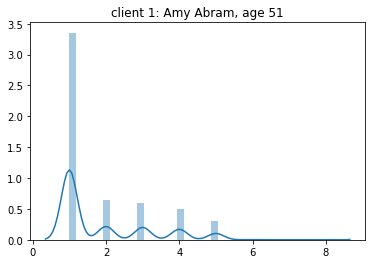

In [31]:
a1 = t[-1,:]+1
sns.distplot(a1)
plt.title('client 1: Amy Abram, age 51')
plt.show()

In [30]:
np.unique(t[-1, :], return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([6180, 1185, 1107,  931,  563,   15,    8,   11]))

In [20]:
from scipy.stats import ttest_1samp
ttest_1samp(client1, 2079.2)

Ttest_1sampResult(statistic=43.19516745970803, pvalue=0.0)

In [21]:
from scipy import stats

t,p_twoTail =stats.ttest_1samp(client1, TARGET)
p_oneTail = p_twoTail/2

print("t=",t,"p_twoTail=",p_twoTail, "p_oneTail = ", p_oneTail)

t= 43.19516745970803 p_twoTail= 0.0 p_oneTail =  0.0


## client 2: Bob Brown

In [22]:
client2, t = simulate(54, 900)
print(client2.mean())
print(client2.mean()>=TARGET)

2031.5331090140846
False


In [23]:
(client2>TARGET).mean()

0.3526

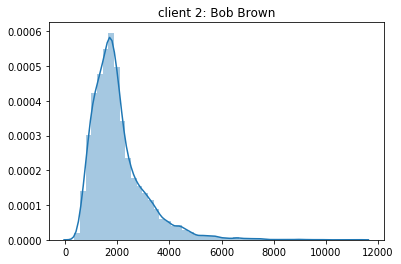

In [24]:
sns.distplot(client2)
plt.title('client 2: Bob Brown')
plt.show()

In [25]:
from scipy.stats import ttest_1samp
ttest_1samp(client2, TARGET)

Ttest_1sampResult(statistic=-4.53342747269011, pvalue=5.8708670830048214e-06)

## client 3: Carla Clausen

In [26]:
client3, t = simulate(54, 500)
print(client3.mean())
print(client3.mean()>=TARGET)

1258.4781021340698
False


In [27]:
(client3>TARGET).mean()

0.0763

In [28]:
from scipy.stats import ttest_1samp
ttest_1samp(client3, TARGET)

Ttest_1sampResult(statistic=-135.30666536700704, pvalue=0.0)

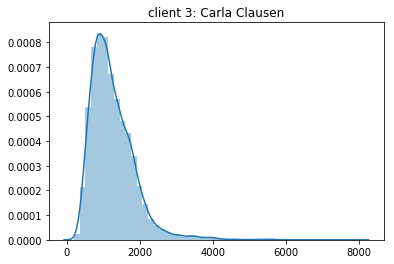

In [29]:
sns.distplot(client3)
plt.title('client 3: Carla Clausen')
plt.show()

## client 4: Darrin Dorne

In [30]:
client4, t = simulate(57, 1500)
print(client4.mean())
print(client4.mean()>=TARGET)

2697.6921670288416
True


In [31]:
(client4>TARGET).mean()

0.614

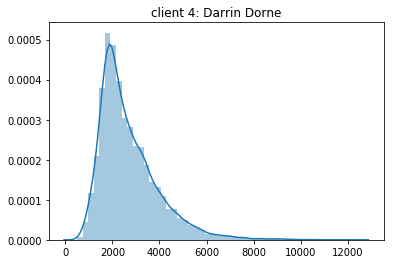

In [32]:
sns.distplot(client4)
plt.title('client 4: Darrin Dorne')
plt.show()

## client 5: Eric Evans

In [46]:
client5, t = simulate(62, 1200)
print(client5.mean())
print(client5.mean()>=TARGET)

1617.3050230518998
False


In [34]:
(client5>TARGET).mean()

0.1329

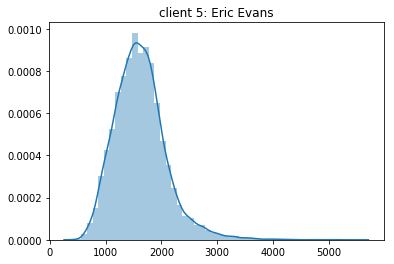

In [35]:
sns.distplot(client5)
plt.title('client 5: Eric Evans')
plt.show()

## client 6: Francine Farnsworth

In [36]:
client6, t = simulate(65, 1600)
print(client6.mean())
print(client6.mean()>=TARGET)

1771.8678836769
False


In [37]:
(client6>TARGET).mean()

0.1241

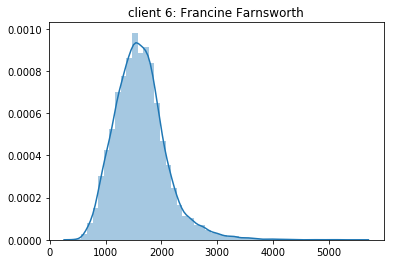

In [38]:
sns.distplot(client5)
plt.title('client 6: Francine Farnsworth')
plt.show()

In [50]:
t[1,:]

array([1, 1, 1, ..., 1, 1, 0])